# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors
import pandas as pd
from scipy.io import wavfile

## Part A: Matrix Transformations (5 points):

In [3]:
####### TODO: PERFORM THE MATRIX TRANSFORMATION HERE ######

# You can modify this point (3,4) to better fit your algorithm.
original_point = [3, 4]
original_point

[3, 4]

In [5]:
# create rotation matrix
rotation_matrix = np.array([[np.cos(np.radians(30)), -np.sin(np.radians(30))], [np.sin(np.radians(30)), np.cos(np.radians(30))]])

rotation_matrix

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [6]:
# multiply the rotation matrix by the original point
new_point = np.dot(rotation_matrix, original_point) 
new_point


array([0.59807621, 4.96410162])

In [7]:
#translate by 3 units rightwards and 2 units downward
Translation=[3, -2]
Translation

[3, -2]

In [8]:
Final_point = new_point + Translation
Final_point

array([3.59807621, 2.96410162])

### The new co-ordinates are 3.59807621, 2.96410162

## Part B: Color Map (10 points):

In [9]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

# We read the data as a CSV file
url = "./datasets/height.csv"
data = pd.read_csv(url, delim_whitespace=True, header=None).values    

# Getting the raw column data as `Long`, `Lat`, and `Elev`
Long = data[:,0]; Lat = data[:,1]; Elev = data[:,2];

tl = 5;
tw = 2;
lw = 3;
S = 30
pts=100000;

# `np.linspace` attempts to create a certain # of points when provided a minimum, a maximum, and an expected # of points
# We generate a meshgrid that creates `np.sqrt(pts)` values between the minimum and maximum possible values 
# along the x-axis (Long) and y-axis (Lat).
[x,y] =np.meshgrid(
  np.linspace( min(Long), max(Long), int(np.sqrt(pts)) ),
  np.linspace( min(Lat), max(Lat), int(np.sqrt(pts)) )
)

# This code interpolates the original datasets (Long, Lat) and their corresponding elevations (Elev) along the 
# coordinates provided by (x,y)
z = griddata((Long, Lat), Elev, (x, y), method='linear')

# We flatten all the data from a 2D to 1D representation
x = np.matrix.flatten(x)
y = np.matrix.flatten(y)
z = np.matrix.flatten(z)

In [10]:
import colorsys
####### TODO: MODIFY THIS PART OF THE CODE ######

def color_map(z):
    min_elevation = np.min(z)
    max_elevation = np.max(z)
    colors = np.zeros((np.size(z), 4))
    for i, elevation in enumerate(z):
        normalized_elevation = (elevation - min_elevation) / (max_elevation - min_elevation)
        red = normalized_elevation
        green = 1 - normalized_elevation
        blue = 0.5
        alpha = 1.0
        colors[i] = [red, green, blue, alpha]
    return colors


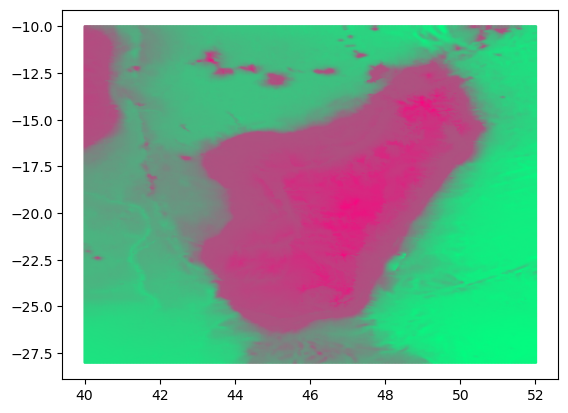

In [11]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #
plt.scatter(x,y,s=1,c=color_map(z))
plt.savefig("part_b_result.png", bbox_inches ="tight", pad_inches = 0)
plt.show()

## BONUS QUESTION: Color Frequency Analysis with Fourier Transforms (2 points):

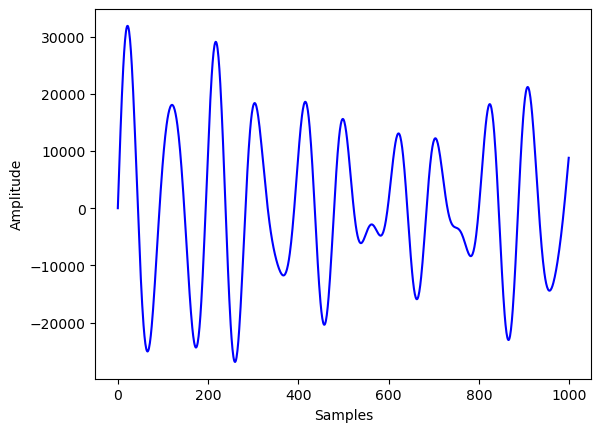

In [12]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

# The input signal has been generated with a 5-second duration, sampled at 44100 Hz
sample_rate, data = wavfile.read('./datasets/signal.wav')
duration = len(data)/sample_rate

# Plot the signal, only sampling the first 1000 data points for easy viewability
plt.plot(data[:1000], 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [13]:
# ####### TODO: MODIFY THIS PART OF THE CODE ######

# def fourier_transform(data, sample_rate, duration):
    
#     xf = np.arange(400,700,1)
#     yf = np.zeros(len(xf))

#     return xf, yf

In [14]:
def fourier_transform(data, sample_rate, duration):
    # Perform Fourier Transformation
    yf = np.fft.fft(data)
    xf = np.fft.fftfreq(len(data), 1/sample_rate)
    
    # Limit to the visible spectrum (400hz to 700hz)
    limit = (xf >= 400) & (xf <= 700)
    xf = xf[limit]
    yf = yf[limit]

    yf=yf/len(data) # Normalization because the values are too high
    
    return xf, yf

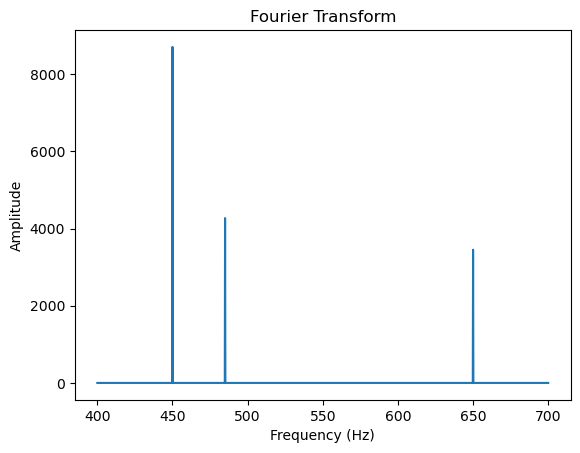

In [15]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

xf, yf = fourier_transform(data, sample_rate, duration)
plt.plot(xf, np.abs(yf))
plt.savefig("bonus_result.png", bbox_inches ="tight", pad_inches = 0)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [16]:
# print the frequencies of three highest peaks between 400 and 700 Hz
sorted_yf = np.sort(np.abs(yf))
sorted_yf = sorted_yf[::-1]
sorted_yf = sorted_yf[:3]
for i in range(3):
    print("Peak #{}: {} Hz".format(i+1, xf[np.where(np.abs(yf) == sorted_yf[i])[0][0]]))
    


Peak #1: 450.0 Hz
Peak #2: 485.0 Hz
Peak #3: 650.0 Hz


## The frequencies of three colors are 450.0 Hz, 485.0 Hz, and 650.0 Hz